# Understanding the Netflix Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #used for data visualization
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netflix_dataset.csv')

In [ ]:
import warnings
import re
import plotly.graph_objs as go
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
print("Shape of the data:", df.shape)

Shape of the data: (8807, 12)


In [ ]:
# Specify the categorical columns to be converted
categorical_cols = ['type', 'rating']

# Convert the specified columns to the 'category' data type
df[categorical_cols] = df[categorical_cols].astype('category')

In [ ]:
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

# Categories of Content

In [ ]:
df.listed_in.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

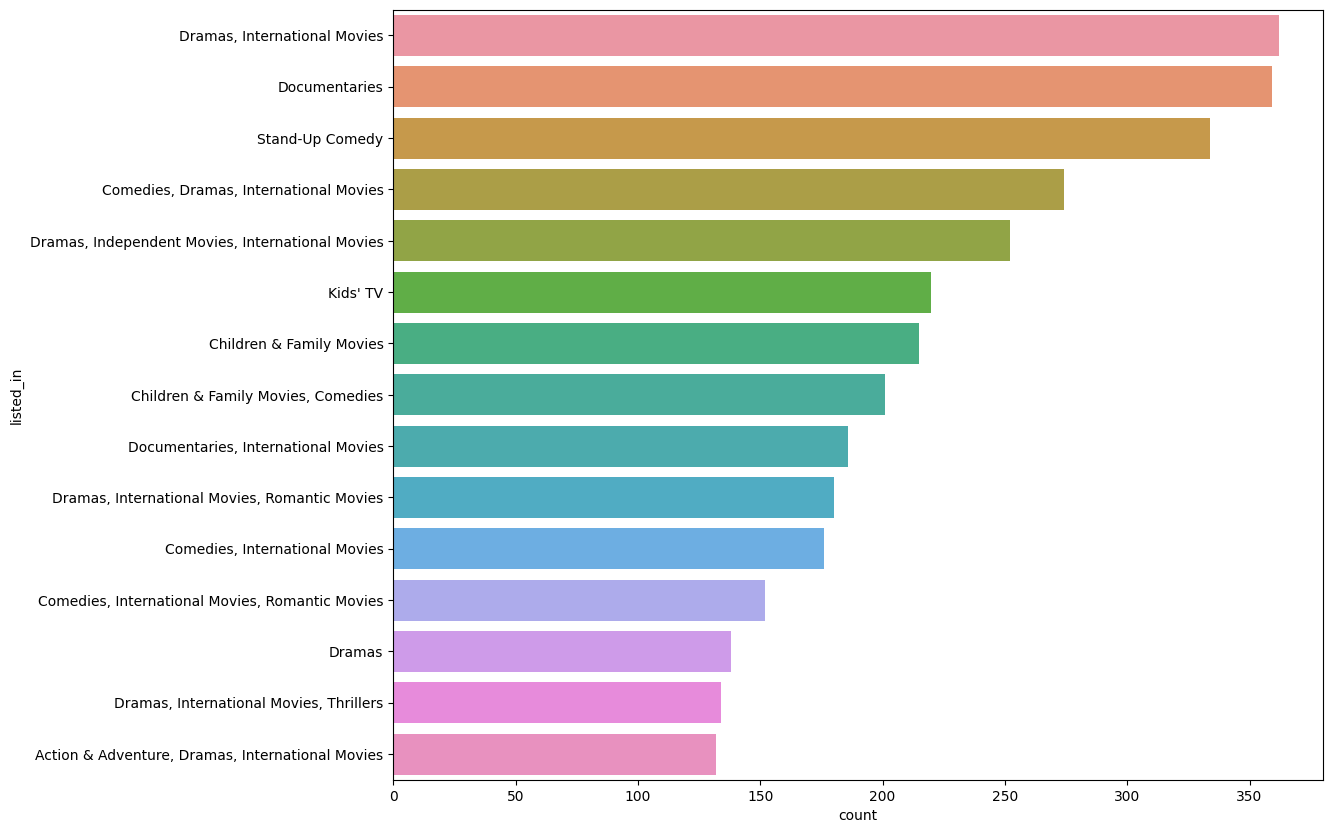

In [ ]:
plt.figure(figsize=(12,10))
ax=sns.countplot(y='listed_in',data=df,order=df.listed_in.value_counts().index[0:15])

# Inspect Missing Values in the Dataset

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values
print("Missing values:")
print(missing_values)

Missing values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
#Dropping rows for small percentages of null

df.dropna(subset=['rating','duration','date_added'],axis=0,inplace=True)
df.shape

(8790, 12)

In [ ]:
round(df.isnull().sum()/df.shape[0]*100,2)

show_id          0.00
type             0.00
title            0.00
director        29.82
cast             9.39
country          9.43
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [ ]:
## Replace missing values in country with Unkown

df['country'] = df['country'].fillna('Unknown')
round(df.isnull().sum()/df.shape[0]*100,2)
df['country'].value_counts()

United States                             2809
India                                      972
Unknown                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [ ]:
df['cast'].value_counts()
df['cast'] = df['cast'].fillna('No Cast')
df['director'] = df['director'].fillna('No Director')
round(df.isnull().sum()/df.shape[0]*100,2)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

#Splitting the dataset into Movies and TV shows

In [ ]:
movies_df=df.loc[(df['type']=='Movie')]
shows_df=df.loc[(df['type']=='TV Show')]
movies_df
shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Director,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,No Director,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,No Director,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,No Director,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [ ]:
# Converting Duration into Numerical Datatype

movies_df.duration=movies_df.duration.apply(lambda x: x.replace('min','') if 'min' in x else x)
movies_df.head(2)

<ipython-input-97-aba02e5f081d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6126 non-null   object
 1   type          6126 non-null   object
 2   title         6126 non-null   object
 3   director      6126 non-null   object
 4   cast          6126 non-null   object
 5   country       6126 non-null   object
 6   date_added    6126 non-null   object
 7   release_year  6126 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6126 non-null   object
 10  listed_in     6126 non-null   object
 11  description   6126 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.2+ KB


In [ ]:
movies_df.loc[:,['duration']]=movies_df.loc[:,['duration']].apply(lambda x:x.astype('int64',errors='ignore'))
movies_df.describe()

<ipython-input-99-2f5935b3aa24>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-2f5935b3aa24>:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,release_year,duration
count,6126.000000,6126.000000
mean,2013.120144,99.584884
std,9.681723,28.283225
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [ ]:
#Shortest Movie

shortest_movie=movies_df.loc[(movies_df['duration']== np.min(movies_df.duration))]
shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",No Cast,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


In [ ]:
#Longest Movie
longest_movie=movies_df.loc[(movies_df['duration']== np.max(movies_df.duration))]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,No Director,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [ ]:
shows_df.duration= shows_df.duration.apply(lambda x:x.replace ('Season','')if 'Season' in x else x)
shows_df.head(2)

<ipython-input-107-de65763fff84>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 s,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
shows_df.duration= shows_df.duration.apply(lambda x:x.replace ('s','')if 's' in x else x)
shows_df.head(2)

<ipython-input-108-d2f87b329c52>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
shows_df.loc[:,['duration']]=shows_df.loc[:,['duration']].apply(lambda x:x.astype('int64',errors='ignore'))
shows_df.describe()

<ipython-input-109-eacd282c2423>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-109-eacd282c2423>:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,release_year,duration
count,2664.000000,2664.000000
mean,2016.627628,1.751877
std,5.735194,1.550622
min,1925.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2020.000000,2.000000
max,2021.000000,17.000000


In [ ]:
# Show with the highest number of season
longest_shows= shows_df.loc[(shows_df['duration']>=13)]
longest_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,No Director,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
1354,s1355,TV Show,Heartland,No Director,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,"February 1, 2021",2019,TV-14,13,TV Dramas,Spunky teenager Amy is reeling from the sudden...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4220,s4221,TV Show,COMEDIANS of the world,No Director,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,"January 1, 2019",2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
4798,s4799,TV Show,NCIS,No Director,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...


#HeatMap ( Months vs Netflix Content Update)

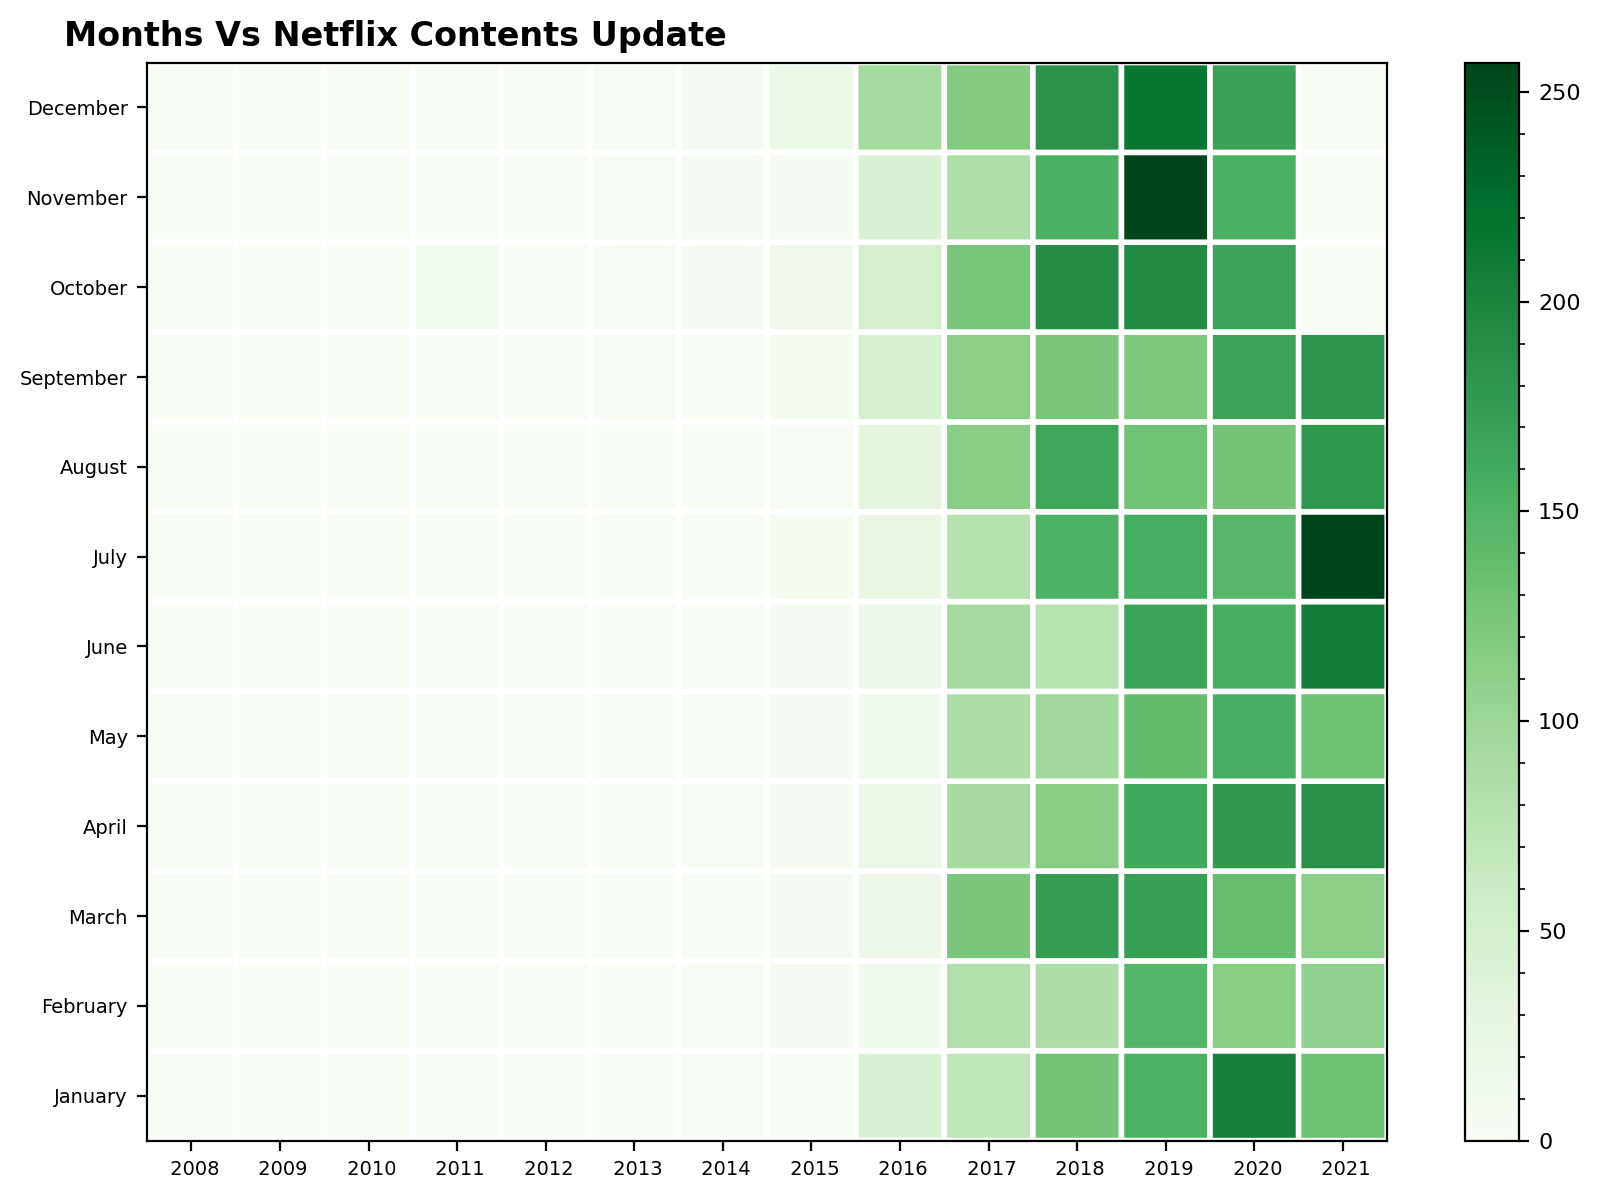

In [ ]:
netflix_date = df[['date_added']].dropna()
netflix_date['year'] = netflix_date[ 'date_added'].apply(lambda x : x.split(',')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
new_df =netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(new_df, cmap="Greens", edgecolors='white',linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(new_df.columns), 1), new_df.columns, fontsize=7,)
plt.yticks(np.arange(0.5, len(new_df. index), 1), new_df.index, fontsize=7)

plt.title( 'Months Vs Netflix Contents Update', fontsize=12, fontweight="bold", position=(0.20,1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

# Number of Movies and TV shows released per year

In [ ]:
# Calculate value counts of a specific column
column_value_counts = df['release_year'].value_counts()

# Print the value counts
print("Value counts:")
print(column_value_counts)

Value counts:
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64


# Grouping of Shows and Movies by country

In [ ]:
df.country.value_counts()
# Group the data by 'Country' and 'Type', and count the occurrences
content_by_country = df.groupby(['country', 'type']).size()
print(content_by_country)

country                                              type   
, France, Algeria                                    Movie       1
, South Korea                                        TV Show     1
Argentina                                            Movie      38
                                                     TV Show    18
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
                                                                ..
Venezuela                                            Movie       1
Venezuela, Colombia                                  Movie       1
Vietnam                                              Movie       7
West Germany                                         Movie       1
Zimbabwe                                             Movie       1
Length: 847, dtype: int64


#How has the number of movies released per year changed over the last 20-30 years?

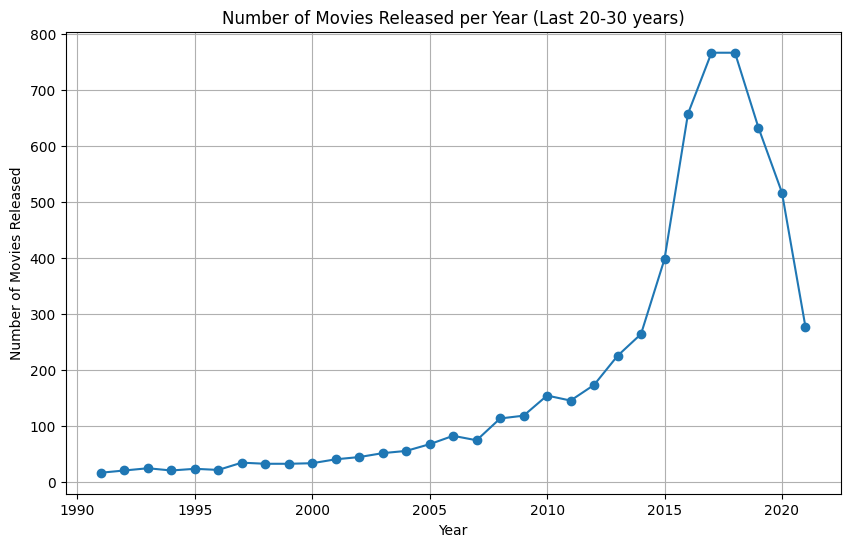

In [ ]:
movies_data= df[['release_year','type']]
movies_data = movies_data[movies_data['type'] == 'Movie']
movies_per_year = movies_data.groupby('release_year').size().reset_index(name='Count')

# Filter data for the last 20-30 years
start_year = 1991
end_year = 2021
filtered_data = movies_per_year[(movies_per_year['release_year'] >= start_year) & (movies_per_year['release_year'] <= end_year)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['release_year'], filtered_data['Count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year (Last 20-30 years)')
plt.grid(True)
plt.show()

#Comparision of TV Shows and Movies

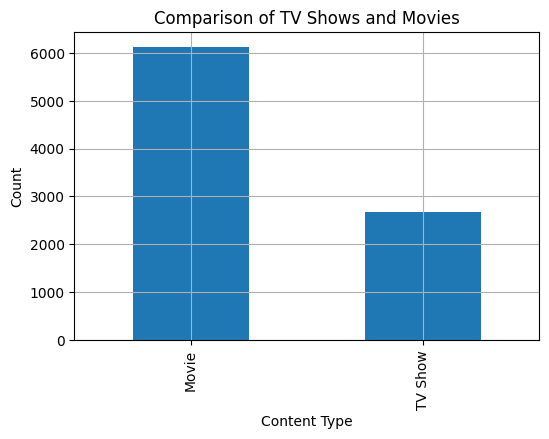

In [ ]:
# Extract the 'Type' column
type_data = df['type']

# Calculate the count or percentage of TV shows and movies
type_counts = type_data.value_counts()
type_percentages = type_counts / type_data.shape[0] * 100
type_percentages

plt.figure(figsize=(6, 4))
type_counts.plot(kind='bar')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Comparison of TV Shows and Movies')
plt.grid(True)
plt.show()

# Best time to Launch a TV Show

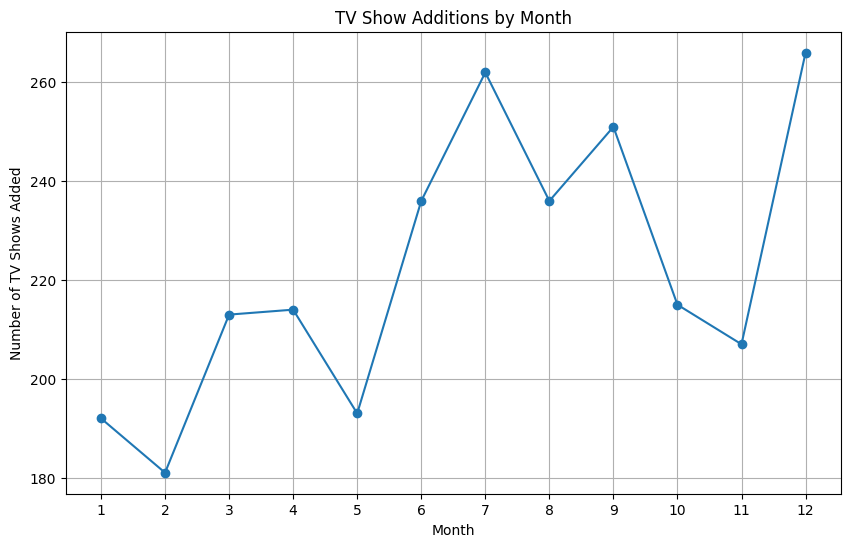

In [ ]:
# Extract the 'Date_added' column
date_added_data = df['date_added']

# Convert 'Date_added' column to datetime data type
df['date_added'] = pd.to_datetime(date_added_data)

# Extract the month and day of the week from 'Date_added'
df['Month_added'] = df['date_added'].dt.month
df['Day_of_week_added'] = df['date_added'].dt.dayofweek

# Group the data by month and count the number of TV shows added in each month
tv_shows_by_month = df[df['type'] == 'TV Show'].groupby('Month_added').size()

# Create a line plot to visualize the TV show additions by month
plt.figure(figsize=(10, 6))
tv_shows_by_month.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows Added')
plt.title('TV Show Additions by Month')
plt.grid(True)
plt.xticks(range(1, 13))  # Adjust the x-axis ticks based on the range of months in your dataset
plt.show()

# Rating Count of TV Shows

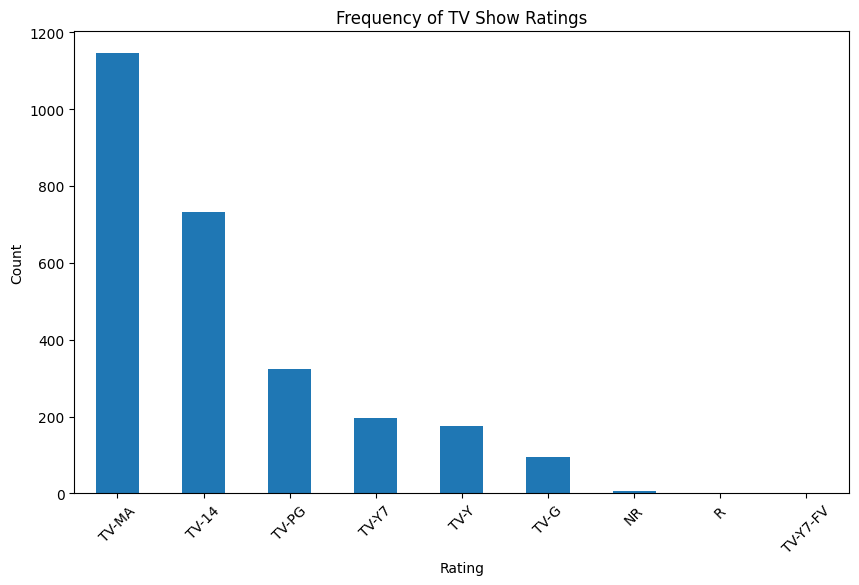

In [ ]:
# Filter the dataset to include only TV shows
tv_shows = df[df['type'] == 'TV Show']

# Count the frequency of each rating category
rating_counts = tv_shows['rating'].value_counts()

# Create a bar plot for the ratings
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Frequency of TV Show Ratings')
plt.xticks(rotation=45)
plt.show()

#Number of Unique Actors and directors

In [ ]:
columns_of_interest = ['type', 'title', 'director', 'cast']
df_selected = df[columns_of_interest]
df_selected

# Group the data by the 'Type' column
grouped_data = df_selected.groupby('type')

# Iterate over each group (TV Show and Movie)
for group_name, group_data in grouped_data:
    print(f"Type: {group_name}")

    # Actors analysis
    all_actors = ', '.join(group_data['cast'].dropna().values)  # Combine all actors in the group
    unique_actors = len(set(all_actors.split(', ')))  # Count the number of unique actors
    print(f"Total unique actors: {unique_actors}")

    # Directors analysis
    all_directors = ', '.join(group_data['director'].dropna().values)  # Combine all directors in the group
    unique_directors = len(set(all_directors.split(', ')))  # Count the number of unique directors
    print(f"Total unique directors: {unique_directors}")

    print()

Type: Movie
Total unique actors: 25951
Total unique directors: 4777

Type: TV Show
Total unique actors: 14863
Total unique directors: 299



# Identifying the top 10 most common actors and directors

---



Top 10 most common actors:
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64

Top 10 most common directors:
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64


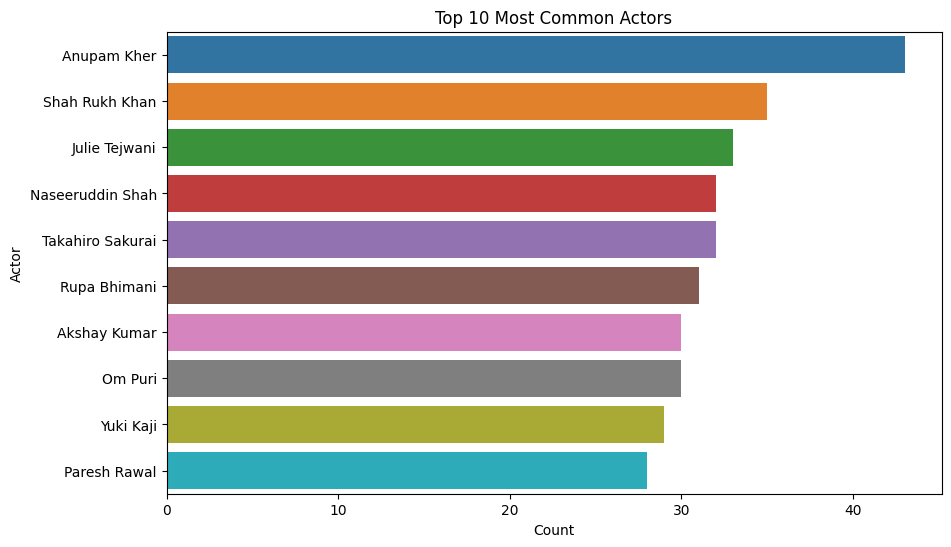

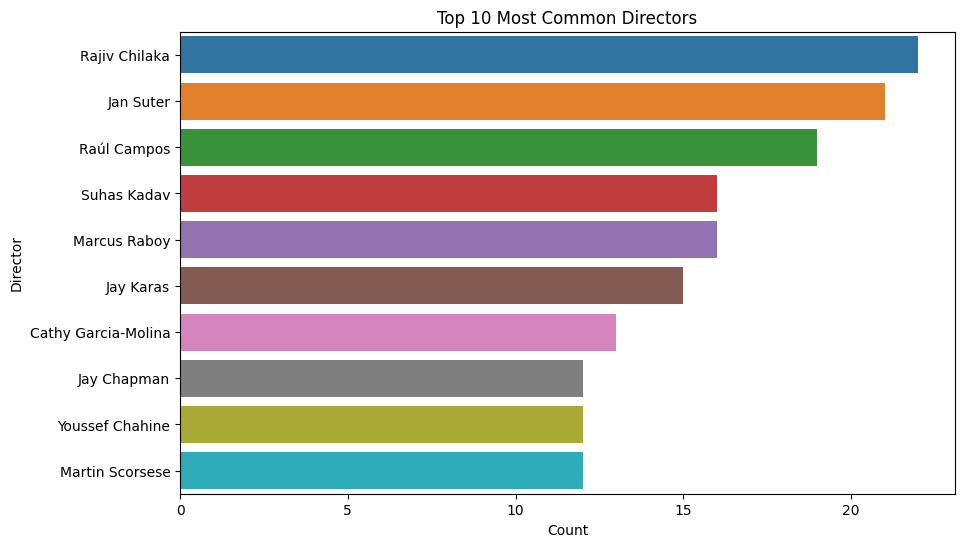

In [ ]:
# For actors
actors_counts = df['cast'].str.split(', ').explode().value_counts()
top_actors = actors_counts.head(10)  # Top 10 most common actors
print("Top 10 most common actors:")
print(top_actors)

# For directors
directors_counts = df['director'].str.split(', ').explode().value_counts()
top_directors = directors_counts.head(10)  # Top 10 most common directors
print("\nTop 10 most common directors:")
print(top_directors)


# Plot the top 10 most common actors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.xlabel('Count')
plt.ylabel('Actor')
plt.title('Top 10 Most Common Actors')
plt.show()


# Plot the top 10 most common directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 10 Most Common Directors')
plt.show()

# Calculating the average number of actors or directors per show/movie

---



In [ ]:
# For actors
df['Num_Actors'] = df['cast'].str.split(', ').apply(lambda x: len(x) if isinstance(x, list) else 0)
average_actors_per_show = df.groupby('type')['Num_Actors'].mean()
print("\nAverage number of actors per show/movie:")
print(average_actors_per_show)

# For directors
df['Num_Directors'] = df['director'].str.split(', ').apply(lambda x: len(x) if isinstance(x, list) else 0)
average_directors_per_show = df.groupby('type')['Num_Directors'].mean()
print("\nAverage number of directors per show/movie:")
print(average_directors_per_show)


Average number of actors per show/movie:
type
Movie      7.254118
TV Show    7.343423
Name: Num_Actors, dtype: float64

Average number of directors per show/movie:
type
Movie      1.087261
TV Show    0.116592
Name: Num_Directors, dtype: float64


# Visualizations to showcase the distribution of actors or directors:

---



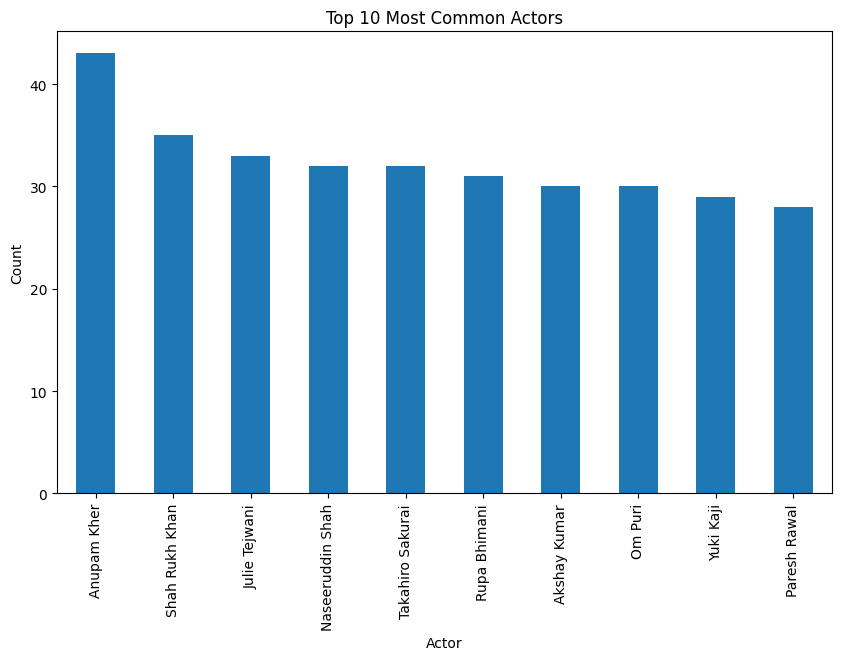

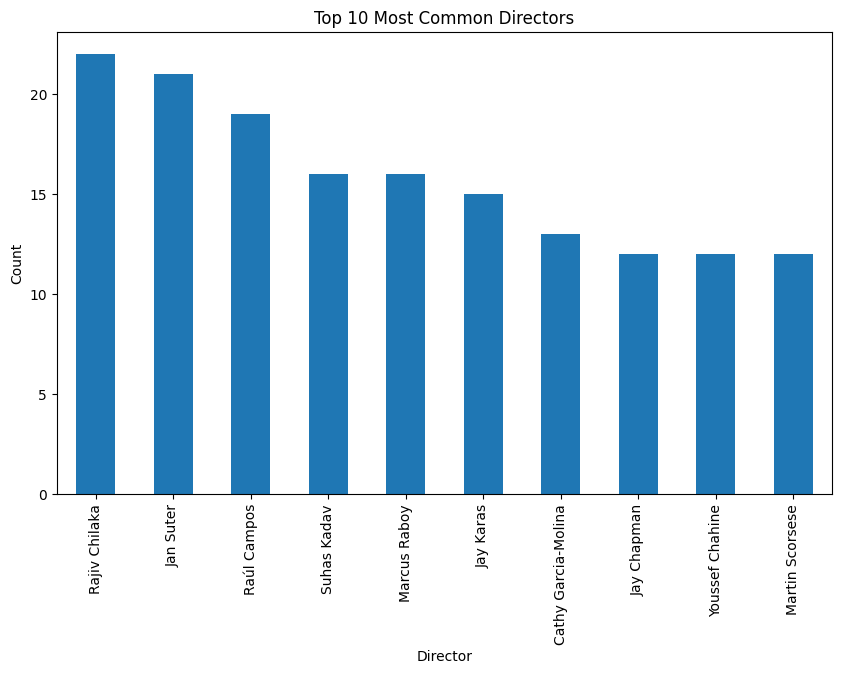

In [ ]:
top_actors.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Top 10 Most Common Actors')
plt.show()

# For directors
top_directors.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Most Common Directors')
plt.show()

#Does Netflix have more focus on TV Shows than movies in recent years
-----

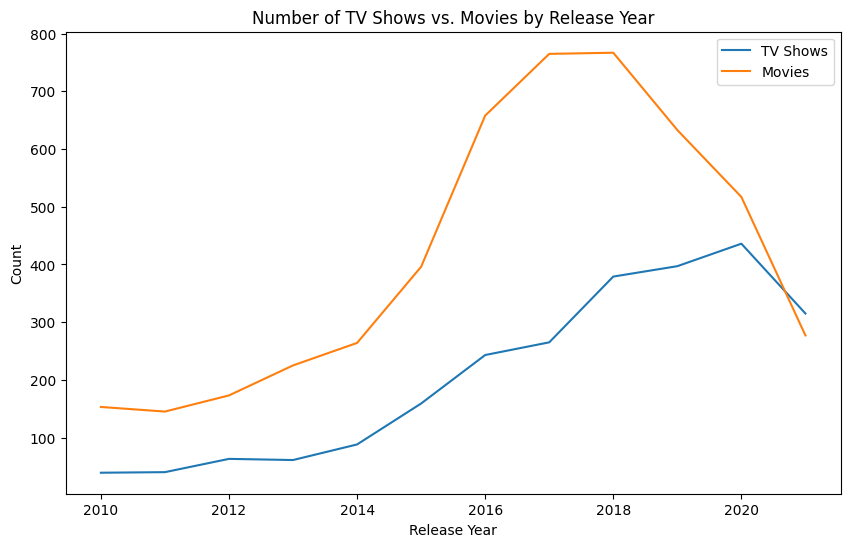

In [ ]:
# Filter the dataset for recent years
recent_years_df = df[df['release_year'] >= 2010]

# Count the number of TV shows and movies by release year
counts_by_year = recent_years_df.groupby(['release_year', 'type']).size().unstack()

# Plot the counts of TV shows and movies by release year
plt.figure(figsize=(10, 6))
sns.lineplot(data=counts_by_year, x='release_year', y='TV Show', label='TV Shows')
sns.lineplot(data=counts_by_year, x='release_year', y='Movie', label='Movies')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Number of TV Shows vs. Movies by Release Year')
plt.legend()
plt.show()

# Analyzing the content produced on netflix based on years

---



In [ ]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')
print(df2)
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


# Business Insights


1.   Content Availability in Different Countries:

*   The dataset reveals that Netflix offers a diverse range of content across multiple countries.
*   Certain countries exhibit a higher concentration of available content, indicating potential target markets for localized content or marketing campaigns.

2.   Shift in Focus: TV Shows vs. Movies:


*   Over the years, Netflix has shown a significant shift in focus towards producing more TV shows compared to movies.
*   The number of TV shows released per year has consistently increased, indicating a strategic emphasis on this content format.
*   This shift might be influenced by changing viewer preferences, production economics, and the success of original TV show productions.

3.   Genre Preferences:

*   Analyzing the listed genres can provide insights into popular content categories and audience preferences. In this case it is 'Dramas, International Movies'
*   Identifying the most popular genres across different countries can guide content production decisions and help tailor offerings to specific markets.




4.  Release Timing:



*   The analysis of release timing can uncover patterns related to the success of TV show launches.
*   The best time to launch the shows would be in the months of July and December


5. Director and Actor Influence:

* Identifying the most common directors and actors can shed light on influential figures in the industry.
* Collaborating with popular directors and actors who have a track record of successful projects may enhance the chances of producing hit shows or movies.
* Most popular actors in this case are Anupam Kher and Shah Rukh Khan and the most popular directors would be Rajiv Shilaka and Jan Suter


6. Global Expansion Opportunities:

* The dataset provides information on the countries where shows and movies are produced.
* Identifying countries with a high concentration of content production can highlight potential expansion opportunities or target regions for localized content creation.









# Recommendations

1. Diversify Content Portfolio:

* Continue expanding the library by diversifying content offerings across different genres and categories to cater to a wide range of viewer preferences.
* Invest in producing original content to differentiate from competitors and offer unique viewing experiences.
2. Focus on TV Show Productions:

* Given the increasing popularity of TV shows, allocate resources and efforts towards producing high-quality original TV shows to capture and retain audience attention.
* Identify trends and preferences in TV show genres to guide content creation decisions.
3. Optimize Release Timing:

* Analyze viewer behavior and preferences to identify optimal release timing for new shows.
* Consider launching shows during periods when viewership is typically high or when there is minimal competition from other platforms or major releases.
4. Strengthen Collaborations:

* Foster partnerships with successful directors, actors, and production houses to create compelling content that resonates with audiences.
* Collaborate with industry influencers and popular talent to increase the appeal and quality of productions.
5. Leverage Global Expansion Opportunities:

* Identify countries with a high demand for streaming services and limited local competition.
* Tailor content offerings to specific regional preferences, languages, and cultural nuances to enhance localization efforts.
6. Monitor and Respond to Viewer Feedback:

* Actively engage with viewers through feedback channels to gather insights and suggestions for improving the content library and user experience.
* Address concerns, incorporate viewer suggestions, and respond to evolving viewer preferences.
7. Invest in Data-Driven Decision Making:

* Leverage data analytics to gain deeper insights into viewer behavior, content performance, and market trends.
* Utilize data to guide content acquisition, production strategies, and marketing campaigns.